# Crosswalk

Meet The Beatles at Abbey Road for Image Processing.

Roland Bruggmann, 2018
https://github.com/brugr9/Crosswalk

In [1]:
%matplotlib inline

In [2]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

silhouette = imread('images/beatles-abbey-road-silhouette.jpg', True)
cover      = imread('images/beatles-abbey-road-cover.jpg', True)

# The Beatles: George Harrison - Paul McCartney - Ringo Starr - John Lennon
george = imread('images/beatles-abbey-road-silhouette-1-george.jpg', True)
paul   = imread('images/beatles-abbey-road-silhouette-2-paul.jpg', True)
ringo  = imread('images/beatles-abbey-road-silhouette-3-ringo.jpg', True)
john   = imread('images/beatles-abbey-road-silhouette-4-john.jpg', True)
thebeatles = [[george, 'coral'], [paul, 'deepskyblue'], [ringo, 'fuchsia'], [john, 'gold']]

## 1. Template Matching

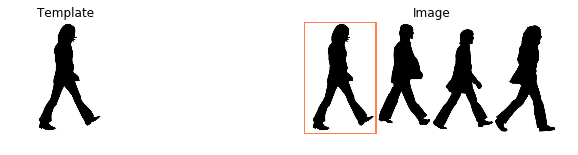

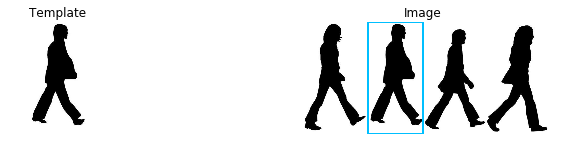

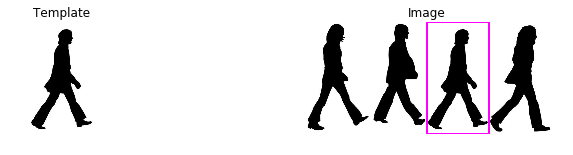

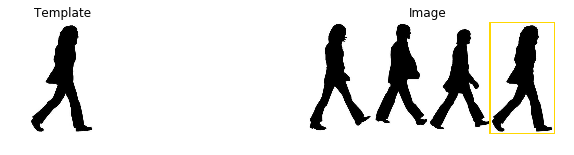

In [3]:
from skimage.feature import match_template

def matchandplot( image, template, color ):
    "Match a template using [...] normalized correlation. \
    The output is an array with values between -1.0 and 1.0. \
    The value at a given position corresponds to the correlation coefficient between the image and the template. \
    [...] Matches correspond [...] to the top-left corner of the template.\
    To find the best match one must search for peaks in the response (output) image."
    
    response = match_template(image, template)
    # search for peaks in the response.
    ij = np.unravel_index(np.argmax(response), response.shape)
    x, y = ij[::-1]
    
    # plot
    fig = plt.figure(figsize=(12, 2))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2, adjustable='box-forced')

    ax1.imshow(template, cmap=plt.cm.gray)
    ax1.set_axis_off()
    ax1.set_title('Template')

    ax2.imshow(image, cmap=plt.cm.gray)
    ax2.set_axis_off()
    ax2.set_title('Image')
    # highlight matched region
    h, w = template.shape
    rect = plt.Rectangle((x, y), w, h, edgecolor=color, facecolor='none', lw=2)
    ax2.add_patch(rect)
    
    plt.show()
    return

for member in thebeatles:
    matchandplot( silhouette, member[0], member[1] )